Implementation of backus gilbert method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(50,)
(50, 500)


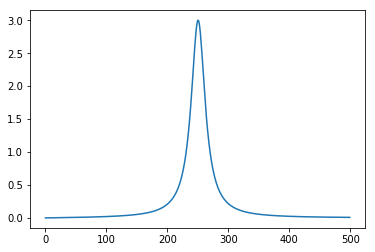

In [3]:
#setup
Nmu=50;
Nt=Nmu;
Nw=500;

mumin=0;
mumax=10;
dmu=(mumax-mumin)/Nmu

wmin=0.001;
wmax=6.;
dw=(wmax-wmin)/Nw;

Frequencies = np.array([wmin+dw*w for w in range(Nw)])


mockrho = [0.1]*Nw

for j in range(Nw):
    mockrho[j]=Frequencies[j]/((Frequencies[j]**2-3**2)**2+1**2)

Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) *
                     dw*np.exp(-(wmin+dw*w)*t) 
                  for w in range(Nw) ] for t in range(1,Nt+1)]);



#Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
#                    dw*2*(wmin+dw*w)/((wmin+dw*w)**2+(mumin+dmu*mu)**2)
#                  for w in range(Nw) ] for mu in range(1,Nmu+1)]);


DataIdeal = np.dot(Kernel,mockrho)

print(DataIdeal.shape)
print(Kernel.shape)
#plt.yscale('log')
#plt.plot(DataIdeal)
plt.plot(mockrho)

In [4]:
NoisyData = [0]*Nmu

#standard deviation scaling
K=1e-3
Nmeas =1000

for i in range(Nmu):
    NoisyData[i]=(np.random.normal(loc=DataIdeal[i],scale=DataIdeal[i]*K*np.sqrt(Nmeas),size=Nmeas))
    
#print(NoisyData)


In [5]:
DataAverage = [0]*len(NoisyData)
Variance= [0]*len(NoisyData)

for j in range(len(NoisyData)):
    DataAverage[j]=np.mean(NoisyData[j])
    Variance[j] = np.var(NoisyData[j])
    
print(DataAverage)
print(Variance)

[0.08421763333126166, 0.007787555779932244, 0.0018243075109457703, 0.0008517163134594918, 0.0005195855660754114, 0.00035192621044586756, 0.00025624239533525504, 0.00019467314013691997, 0.00015283873925924036, 0.00012359148849405528, 0.0001016561052606768, 8.540644406505124e-05, 7.264751684537468e-05, 6.255055627436945e-05, 5.439098532032932e-05, 4.778529719121266e-05, 4.2283996736356816e-05, 3.768092238253139e-05, 3.371030515974447e-05, 3.0429160891258713e-05, 2.7623318352111718e-05, 2.515569894623386e-05, 2.2991681963019032e-05, 2.1071629502147903e-05, 1.9379548960759817e-05, 1.7954403508859533e-05, 1.663264362576846e-05, 1.5429275465506546e-05, 1.4381924916967687e-05, 1.3423577136848124e-05, 1.2562023246806843e-05, 1.1792439976006327e-05, 1.1083603941657361e-05, 1.0415762443609398e-05, 9.828500233430038e-06, 9.286038028407033e-06, 8.776800373032409e-06, 8.298614102791904e-06, 7.890417547488309e-06, 7.482121099991429e-06, 7.118202661138011e-06, 6.771571308378214e-06, 6.472382101956350

In [6]:
AutoCorrelationCorr=1.; 

#standard covariance expression, why (Nmeas-1.)*Nmeas?
DataCovarianceMatrix=AutoCorrelationCorr*np.array([[ sum( np.array([ ( NoisyData[i][n]-DataAverage[i] )*
                                     ( NoisyData[j][n]-DataAverage[j] )/((Nmeas-1.)*Nmeas) for n in range(Nmeas)]) )
                  for i in range(Nmu) ] for j in range(Nmu)]);
print(DataCovarianceMatrix.shape)
print(DataCovarianceMatrix)

(50, 50)
[[ 7.47229486e-09 -3.73656170e-11 -9.95564519e-13 ...  2.08084019e-14
   1.72465882e-14 -1.74838392e-14]
 [-3.73656170e-11  6.41211342e-11 -3.11632533e-13 ...  4.54822250e-16
  -7.46358779e-16 -9.74553964e-16]
 [-9.95564519e-13 -3.11632533e-13  3.48617042e-12 ... -1.59827820e-16
  -4.57159747e-17 -1.37115915e-16]
 ...
 [ 2.08084019e-14  4.54822250e-16 -1.59827820e-16 ...  2.72453661e-17
  -6.25198443e-19 -6.52521732e-19]
 [ 1.72465882e-14 -7.46358779e-16 -4.57159747e-17 ... -6.25198443e-19
   2.46884304e-17 -1.17678173e-18]
 [-1.74838392e-14 -9.74553964e-16 -1.37115915e-16 ... -6.52521732e-19
  -1.17678173e-18  2.24192647e-17]]


In [7]:
RM=np.array([[  np.exp(-(wmin+dw*w)*t) for w in range(Nw) ] for t in range(1,Nt+1)])

R = np.array([sum(RM[i,j]*(0.5 if j==0 or j==Nw-1 else 1.) for j in range(Nw)) for i in range(Nt)])*dw
S = DataCovarianceMatrix

In [8]:
#antiderivative of "spread matrix"
def intW(i,j,w,x):
    return np.exp(-x*(i+j)) * (-2 + 2*j*(w-x) - i**2*(w-x)**2 - j**2*(w-x)**2 - 2*i*(-w+x)*(1+j*(-w+x))) / (i+j)**3
   

In [99]:
W = np.empty((Nt,Nt))
u = np.empty(Nw)

for x in range(Nw):
   
    print(x)
    wcurrent = wmin+dw*x
    
    #Computing spread matrix
    for i in range(Nt):
        for j in range(Nt):
            W[i,j]=0
            if(i > j):
                W[i,j] = W[j,i]
            else:
                for w in range(Nw):
                    dwc = (0.5 if w == 0 or w== Nw-1 else 1.)*dw
                    W[i,j] += (Frequencies[w]-wcurrent)**2*RM[i,w]*RM[j,w]*dwc
                #W[i,j] = intW(i+1,j+1, wcurrent, wmax) - intW(i+1,j+1, wcurrent, wmin)
            
    
    y = np.linalg.solve((W+10*S),R)
    
    u[x] = (DataAverage@y)/(R@y)
    
    
    


0
1


KeyboardInterrupt: 

In [12]:
W = np.empty((Nt,Nt))
u1 = np.empty(Nw)

for x in range(Nw):
   
    #print(x)
    wcurrent = wmin+dw*x
    
    #Computing spread matrix
    for i in range(Nt):
        for j in range(Nt):
            W[i,j]=0
            if(i > j):
                W[i,j] = W[j,i]
            else:
                W[i,j] = intW(i+1,j+1, wcurrent, wmax) - intW(i+1,j+1, wcurrent, wmin)
            
    
    y = np.linalg.solve((W+20*S),R)
    
    u1[x] = (DataAverage@y)/(R@y)
    
    
    


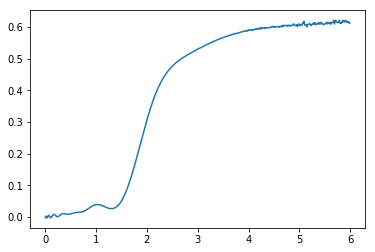

In [16]:
plt.plot(Frequencies,u1)
#plt.plot(Frequencies,mockrho)

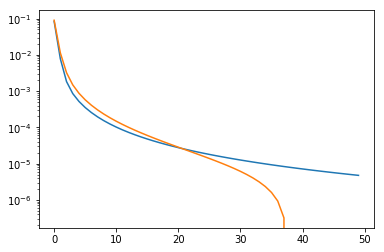

In [17]:
plt.yscale('log')

plt.plot(DataIdeal)
#plt.plot(np.dot(Kernel,u))
plt.plot(np.dot(Kernel,u1))
#plt.plot(np.dot(Kernel,testrho))